In [ ]:
!pip install transformers

In [ ]:
import torch

PART-1

In [ ]:
from transformers import AutoModelForSeq2SeqLM, AutoTokenizer

model = AutoModelForSeq2SeqLM.from_pretrained("google/flan-t5-small")
tokenizer = AutoTokenizer.from_pretrained("google/flan-t5-small")

In [ ]:
model.config

T5Config {
  "_name_or_path": "google/flan-t5-small",
  "architectures": [
    "T5ForConditionalGeneration"
  ],
  "d_ff": 1024,
  "d_kv": 64,
  "d_model": 512,
  "decoder_start_token_id": 0,
  "dense_act_fn": "gelu_new",
  "dropout_rate": 0.1,
  "eos_token_id": 1,
  "feed_forward_proj": "gated-gelu",
  "initializer_factor": 1.0,
  "is_encoder_decoder": true,
  "is_gated_act": true,
  "layer_norm_epsilon": 1e-06,
  "model_type": "t5",
  "n_positions": 512,
  "num_decoder_layers": 8,
  "num_heads": 6,
  "num_layers": 8,
  "output_past": true,
  "pad_token_id": 0,
  "relative_attention_max_distance": 128,
  "relative_attention_num_buckets": 32,
  "task_specific_params": {
    "summarization": {
      "early_stopping": true,
      "length_penalty": 2.0,
      "max_length": 200,
      "min_length": 30,
      "no_repeat_ngram_size": 3,
      "num_beams": 4,
      "prefix": "summarize: "
    },
    "translation_en_to_de": {
      "early_stopping": true,
      "max_length": 300,
      "num_be

Summarisation Task

In [ ]:
inputs = tokenizer("""Summarize: Architecturally, the school has a Catholic character. Atop the Main Building's gold dome is a golden statue of the Virgin Mary. Immediately in front of the Main Building and facing it, is a copper statue of Christ with arms upraised with the legend "Venite Ad Me Omnes". Next to the Main Building is the Basilica of the Sacred Heart. Immediately behind the basilica is the Grotto, a Marian place of prayer and reflection. It is a replica of the grotto at Lourdes, France where the Virgin Mary reputedly appeared to Saint Bernadette Soubirous in 1858. At the end of the main drive (and in a direct line that connects through 3 statues and the Gold Dome), is a simple, modern stone statue of Mary.""", return_tensors="pt")
outputs = model.generate(**inputs)
print(tokenizer.batch_decode(outputs, skip_special_tokens=True))

/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1369: UserWarning: Using `max_length`'s default (20) to control the generation length. This behaviour is deprecated and will be removed from the config in v5 of Transformers -- we recommend using `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


['The main entrance to the school is a sand castle.']


Translation Task

In [ ]:
inputs = tokenizer("translate English to French: A step by step recipe to make bolognese pasta", return_tensors="pt")
outputs = model.generate(**inputs)
print(tokenizer.batch_decode(outputs, skip_special_tokens=True))

["Un risqué d'élaboration de l'assa"]


Q&A Task

In [ ]:
inputs = tokenizer("""Answer the following question based on the context.\nContext: Architecturally, the school has a Catholic character. Atop the Main Building's gold dome is a golden statue of the Virgin Mary. Immediately in front of the Main Building and facing it, is a copper statue of Christ with arms upraised with the legend "Venite Ad Me Omnes". Next to the Main Building is the Basilica of the Sacred Heart. Immediately behind the basilica is the Grotto, a Marian place of prayer and reflection. It is a replica of the grotto at Lourdes, France where the Virgin Mary reputedly appeared to Saint Bernadette Soubirous in 1858. At the end of the main drive (and in a direct line that connects through 3 statues and the Gold Dome), is a simple, modern stone statue of Mary.\nQuestion: To whom did the Virgin Mary allegedly appear in 1858 in Lourdes France?""", return_tensors="pt")
outputs = model.generate(**inputs, num_beams = 4, do_sample = True)
print(tokenizer.batch_decode(outputs, skip_special_tokens=True))

['Saint Bernadette Soubirous']


In [ ]:
total_params = 0
total_size = 0
for name,param in model.named_parameters():
  print(f"Layer Name: {name} || Tensor size: {param.size()}")
  total_params += param.numel()
  total_size += param.numel() * param.element_size()

Layer Name: shared.weight || Tensor size: torch.Size([32128, 512])
Layer Name: encoder.block.0.layer.0.SelfAttention.q.weight || Tensor size: torch.Size([384, 512])
Layer Name: encoder.block.0.layer.0.SelfAttention.k.weight || Tensor size: torch.Size([384, 512])
Layer Name: encoder.block.0.layer.0.SelfAttention.v.weight || Tensor size: torch.Size([384, 512])
Layer Name: encoder.block.0.layer.0.SelfAttention.o.weight || Tensor size: torch.Size([512, 384])
Layer Name: encoder.block.0.layer.0.SelfAttention.relative_attention_bias.weight || Tensor size: torch.Size([32, 6])
Layer Name: encoder.block.0.layer.0.layer_norm.weight || Tensor size: torch.Size([512])
Layer Name: encoder.block.0.layer.1.DenseReluDense.wi_0.weight || Tensor size: torch.Size([1024, 512])
Layer Name: encoder.block.0.layer.1.DenseReluDense.wi_1.weight || Tensor size: torch.Size([1024, 512])
Layer Name: encoder.block.0.layer.1.DenseReluDense.wo.weight || Tensor size: torch.Size([512, 1024])
Layer Name: encoder.block.0.l

In [ ]:
print(f"Total trainable parameters: {total_params:_}, Size in MB: {total_size/(1024*1024)}MB")

Total trainable parameters: 76_961_152, Size in MB: 293.58349609375MB


Setting tensor in model.decoder.final_layer_norm.weight to 0.


In [ ]:
with torch.no_grad():
  model.decoder.final_layer_norm.weight = torch.nn.Parameter(torch.zeros_like(model.decoder.final_layer_norm.weight))

Check the altered layer:

In [ ]:
model.decoder.final_layer_norm.weight

Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.

translation after weight resetting

In [ ]:
inputs = tokenizer("translate from English to French: A step by step recipe to make bolognese pasta", return_tensors="pt")
outputs = model.generate(**inputs, num_beams = 4, do_sample = True)
print(tokenizer.batch_decode(outputs, skip_special_tokens=True))

['MessengerDu registered subsidiaryalternating cellesnnouncing dual enclosure needed Divi duration rămas Zauberych categoriestorilor retailers Füße']


Q&A after weight resetting

In [ ]:
inputs = tokenizer("""Answer the following question based on the context.\nContext: Architecturally, the school has a Catholic character. Atop the Main Building's gold dome is a golden statue of the Virgin Mary. Immediately in front of the Main Building and facing it, is a copper statue of Christ with arms upraised with the legend "Venite Ad Me Omnes". Next to the Main Building is the Basilica of the Sacred Heart. Immediately behind the basilica is the Grotto, a Marian place of prayer and reflection. It is a replica of the grotto at Lourdes, France where the Virgin Mary reputedly appeared to Saint Bernadette Soubirous in 1858. At the end of the main drive (and in a direct line that connects through 3 statues and the Gold Dome), is a simple, modern stone statue of Mary.\nQuestion: To whom did the Virgin Mary allegedly appear in 1858 in Lourdes France?""", return_tensors="pt")
outputs = model.generate(**inputs, num_beams = 4, do_sample = True)
print(tokenizer.batch_decode(outputs, skip_special_tokens=True))

['aß mecanic Lieb acuz 16 Alicefab possession butcutaneousoléfindéanmoins jumpscheibe Bat Irving cadouri marks']


Replacing layers with smaller dimensions

In [ ]:
with torch.no_grad():
  model.decoder.final_layer_norm.weight = torch.nn.Parameter(torch.randn(384))
  model.decoder.block[7].layer[2].layer_norm.weight = torch.nn.Parameter(torch.randn(384))
  model.decoder.block[7].layer[2].DenseReluDense.wo.weight = torch.nn.Parameter(torch.randn(384,1024))
  model.lm_head.weight = torch.nn.Parameter(torch.randn(384, 32128))

In [ ]:
total_params = 0
total_size = 0
for name,param in model.named_parameters():
  print(f"Layer Name: {name} || Tensor size: {param.size()}")
  total_params += param.numel()
  total_size += param.numel() * param.element_size()

Layer Name: shared.weight || Tensor size: torch.Size([32128, 512])
Layer Name: encoder.block.0.layer.0.SelfAttention.q.weight || Tensor size: torch.Size([384, 512])
Layer Name: encoder.block.0.layer.0.SelfAttention.k.weight || Tensor size: torch.Size([384, 512])
Layer Name: encoder.block.0.layer.0.SelfAttention.v.weight || Tensor size: torch.Size([384, 512])
Layer Name: encoder.block.0.layer.0.SelfAttention.o.weight || Tensor size: torch.Size([512, 384])
Layer Name: encoder.block.0.layer.0.SelfAttention.relative_attention_bias.weight || Tensor size: torch.Size([32, 6])
Layer Name: encoder.block.0.layer.0.layer_norm.weight || Tensor size: torch.Size([512])
Layer Name: encoder.block.0.layer.1.DenseReluDense.wi_0.weight || Tensor size: torch.Size([1024, 512])
Layer Name: encoder.block.0.layer.1.DenseReluDense.wi_1.weight || Tensor size: torch.Size([1024, 512])
Layer Name: encoder.block.0.layer.1.DenseReluDense.wo.weight || Tensor size: torch.Size([512, 1024])
Layer Name: encoder.block.0.l

PART-2 finetuning the flan-t5 model on SQuAD dataset

---



In [ ]:
!pip install datasets

In [ ]:
from datasets import load_dataset
train_dataset = load_dataset('squad', split='train')
val_dataset = load_dataset('squad', split='validation')

In [ ]:
train_dataset

Dataset({
    features: ['id', 'title', 'context', 'question', 'answers'],
    num_rows: 87599
})

In [ ]:
val_dataset

Dataset({
    features: ['id', 'title', 'context', 'question', 'answers'],
    num_rows: 10570
})

In [ ]:
train_dataset.features

{'id': Value(dtype='string', id=None),
 'title': Value(dtype='string', id=None),
 'context': Value(dtype='string', id=None),
 'question': Value(dtype='string', id=None),
 'answers': Sequence(feature={'text': Value(dtype='string', id=None), 'answer_start': Value(dtype='int32', id=None)}, length=-1, id=None)}

In [ ]:
train_dataset[0]

{'id': '5733be284776f41900661182',
 'title': 'University_of_Notre_Dame',
 'context': 'Architecturally, the school has a Catholic character. Atop the Main Building\'s gold dome is a golden statue of the Virgin Mary. Immediately in front of the Main Building and facing it, is a copper statue of Christ with arms upraised with the legend "Venite Ad Me Omnes". Next to the Main Building is the Basilica of the Sacred Heart. Immediately behind the basilica is the Grotto, a Marian place of prayer and reflection. It is a replica of the grotto at Lourdes, France where the Virgin Mary reputedly appeared to Saint Bernadette Soubirous in 1858. At the end of the main drive (and in a direct line that connects through 3 statues and the Gold Dome), is a simple, modern stone statue of Mary.',
 'question': 'To whom did the Virgin Mary allegedly appear in 1858 in Lourdes France?',
 'answers': {'text': ['Saint Bernadette Soubirous'], 'answer_start': [515]}}

In [ ]:
CONTEXT, QUESTION, ANSWER = train_dataset['context'], train_dataset['question'], train_dataset['answers']
VAL_CONTEXT, VAL_QUESTION, VAL_ANSWER = val_dataset['context'], val_dataset['question'], val_dataset['answers']

Distribution of answer lenghts in the dataset (#space_seperated_tokens)

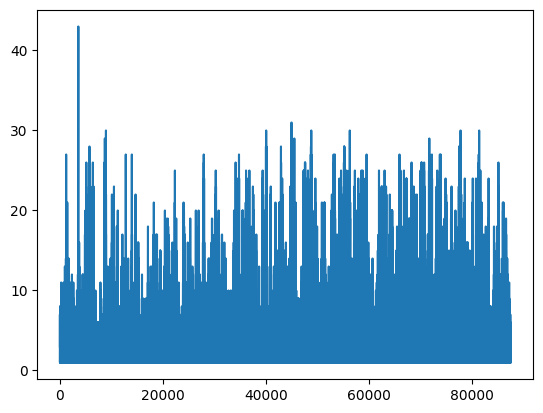

In [ ]:
import matplotlib.pyplot as plt
plt.plot([len(s['text'][0].split()) for s in ANSWER])

In [ ]:
len(CONTEXT) == len(QUESTION) ==  len(ANSWER)

True

In [ ]:
from transformers import AutoModelForSeq2SeqLM, AutoTokenizer

model = AutoModelForSeq2SeqLM.from_pretrained("google/flan-t5-small")
tokenizer = AutoTokenizer.from_pretrained("google/flan-t5-small")

In [ ]:
from torch.utils.data import Dataset, DataLoader
from typing import List, Dict
import random

class SquadDataset(Dataset):
  def __init__(self, CONTEXT: List[str], QUESTION: List[str], ANSWER: List[dict[str: List[int|str]]]):

    self.CONTEXT, self.QUESTION = CONTEXT, QUESTION

    self.ANSWER = [items['text'][0] for items in ANSWER]

    assert len(self.CONTEXT) == len(self.QUESTION) ==  len(self.ANSWER)

  def __len__(self):
    return len(self.CONTEXT)

  def __getitem__(self, index):

    # sample one instruction form the given set
    prefix = random.sample(['Give short one-liner answer for the question based on the context.', 'Read the given context and answer the following question.'], 1)

    return {
        "encoder_input": f"""{prefix}\nQuestion: {self.QUESTION[index]}\nContext: {self.CONTEXT[index]}""",
        "output": self.ANSWER[index]
    }


dataset_size = len(train_dataset)

# setting the train and validation sizes to smaller values
TRAIN_SIZE = 40000
VAL_SIZE = 5000

TrainDataset = SquadDataset(CONTEXT[:TRAIN_SIZE], QUESTION[:TRAIN_SIZE], ANSWER[:TRAIN_SIZE])
ValDataset = SquadDataset(VAL_CONTEXT[:VAL_SIZE], VAL_QUESTION[:VAL_SIZE], VAL_ANSWER[:VAL_SIZE])

BATCH_SIZE = 5
train_dataloader = DataLoader(TrainDataset, shuffle = True, batch_size = BATCH_SIZE)
val_dataloader = DataLoader(ValDataset, shuffle = False, batch_size = BATCH_SIZE)

device = 'cuda' if torch.cuda.is_available() else 'cpu'

model.to(device)

In [ ]:
def QA_generation(model, data_loader):
  GroundTruth_answers = []
  Predicted_answers = []

  model.eval()

  with torch.no_grad():

    for step,X in enumerate(data_loader):

        inputs = tokenizer(X['encoder_input'], padding=True, truncation=True, return_tensors="pt").to(device)
        outputs = model.generate(**inputs, num_beams=4,
                                do_sample=True,
                                min_length=1,
                                max_length=30,
                                eos_token_id=model.config.eos_token_id
                                )
        outputs = tokenizer.batch_decode(outputs, skip_special_tokens=True)

        GroundTruth_answers.extend(X['output'])
        Predicted_answers.extend(outputs)

  return GroundTruth_answers, Predicted_answers

In [ ]:
GroundTruth_answers, pretrained_Predicted_answers = QA_generation(model, val_dataloader)

In [ ]:
from torch.optim import Adam

optimizer = Adam(model.parameters(), lr = 3e-4)

In [ ]:
model.device

device(type='cuda', index=0)

In [ ]:
import tqdm

EPOCHS = 1
LOSS = []
VAL_LOSS = []
train_steps = 0
loss = 0
total_loss = 0
gradient_accumulation_steps = 10 # effective batch_size = 40
validation_steps = 100

train_loss = 0
for n_epoch in tqdm.tqdm(range(EPOCHS)):
  model.train()

  for step,X in enumerate(train_dataloader):
    train_steps += 1

    inputs = tokenizer(X['encoder_input'], padding=True, truncation=True, return_tensors = 'pt').to(device)
    output = tokenizer(text_target=X['output'] , padding=True, truncation=True, return_tensors = 'pt').to(device)

    loss = model(**inputs, labels=output['input_ids']).loss

    loss.backward()
    total_loss += loss.item()

    if train_steps%gradient_accumulation_steps == 0:

      optimizer.step()
      optimizer.zero_grad()

      LOSS.append(total_loss/(gradient_accumulation_steps * BATCH_SIZE))
      torch.cuda.empty_cache()

      train_loss += total_loss
      total_loss = 0

    if train_steps%validation_steps == 0:

      model.eval()
      val_loss = 0

      with torch.no_grad():
        for step,Y in enumerate(val_dataloader):

          inputs = tokenizer(Y['encoder_input'], padding=True, truncation=True, return_tensors = 'pt').to(device)
          output = tokenizer(text_target=Y['output'] , padding=True, truncation=True, return_tensors = 'pt').to(device)

          loss = model(**inputs, labels=output['input_ids']).loss
          val_loss += loss.item()

      VAL_LOSS.append(val_loss/(len(val_dataloader)*BATCH_SIZE))

      print(f"Train Steps: {train_steps}, Avg. Training Loss: {train_loss/(validation_steps*BATCH_SIZE):0.5f}, Avg. Validation Loss: {val_loss/(len(val_dataloader)*BATCH_SIZE):.5f}")

      train_loss = 0


  0%|          | 0/1 [00:00<?, ?it/s]

Train Steps: 100, Avg. Training Loss: 2.91862, Avg. Validation Loss: 1.69251
Train Steps: 200, Avg. Training Loss: 1.26650, Avg. Validation Loss: 0.86743
Train Steps: 300, Avg. Training Loss: 0.65730, Avg. Validation Loss: 0.48821
Train Steps: 400, Avg. Training Loss: 0.42854, Avg. Validation Loss: 0.35133
Train Steps: 500, Avg. Training Loss: 0.29941, Avg. Validation Loss: 0.25264
Train Steps: 600, Avg. Training Loss: 0.19086, Avg. Validation Loss: 0.17444
Train Steps: 700, Avg. Training Loss: 0.13654, Avg. Validation Loss: 0.13007
Train Steps: 800, Avg. Training Loss: 0.09405, Avg. Validation Loss: 0.11277
Train Steps: 900, Avg. Training Loss: 0.07561, Avg. Validation Loss: 0.10552
Train Steps: 1000, Avg. Training Loss: 0.07319, Avg. Validation Loss: 0.10044
Train Steps: 1100, Avg. Training Loss: 0.08453, Avg. Validation Loss: 0.09672
Train Steps: 1200, Avg. Training Loss: 0.06221, Avg. Validation Loss: 0.09478
Train Steps: 1300, Avg. Training Loss: 0.06714, Avg. Validation Loss: 0.0

100%|██████████| 1/1 [1:04:52<00:00, 3892.47s/it]

Train Steps: 8000, Avg. Training Loss: 0.05194, Avg. Validation Loss: 0.08171


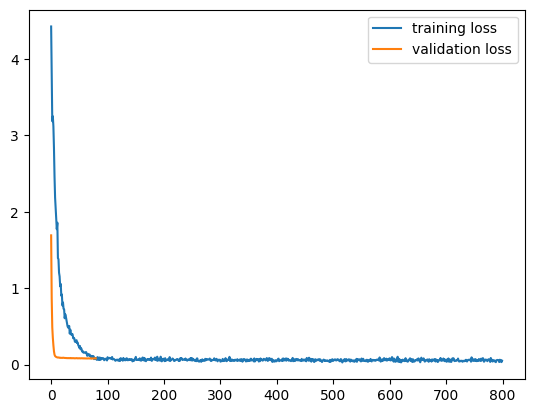

In [ ]:
import matplotlib.pyplot as plt

plt.plot(LOSS, label = "training loss")
plt.plot(VAL_LOSS, label = "validation loss")
plt.legend()

In [ ]:
GroundTruth_answers, finetuned_Predicted_answers = QA_generation(model, val_dataloader)

Evaluation of finetuned model

In [ ]:
!pip install rouge-score

In [ ]:
from datasets import load_metric
from statistics import mean

def modified_bleu(scores: dict):

  x = 1.0
  for _ in scores['precisions'][:scores['reference_length']]:
    x *= _

  return scores['brevity_penalty'] * (x ** (1 / len(scores['precisions'][:scores['reference_length']])))


def compute_evaluation_metrics(GroundTruth_answers,Predicted_answers):
  bleu = load_metric("bleu")
  Avg_bleu_Score = mean([modified_bleu(bleu.compute(predictions=[b.split()], references=[[a.split()]])) for a,b in zip(GroundTruth_answers,Predicted_answers)])

  rouge = load_metric("rouge")
  Avg_rouge_Score = mean([rouge.compute(use_aggregator=False, predictions=[b], references=[a])['rouge1'][0].fmeasure for a,b in zip(GroundTruth_answers,Predicted_answers)])

  print(f"Bleu-score: {Avg_bleu_Score}, ROUGE-score: {Avg_rouge_Score}")



def exact_match_score(GroundTruth_answers, Predicted_answers):

  return sum([1 for a,b in zip(GroundTruth_answers, Predicted_answers) if a==b])


QA performance from pretrained model

In [ ]:
compute_evaluation_metrics(GroundTruth_answers, pretrained_Predicted_answers)

Bleu-score: 0.5508325421821997, ROUGE-score: 0.6718596525710846


QA performance from finetuned model

In [ ]:
compute_evaluation_metrics(GroundTruth_answers, finetuned_Predicted_answers)

Bleu-score: 0.641538022737342, ROUGE-score: 0.7678881204793092


Comparison in exact-match scores

In [ ]:
print(f"Before finetuning: {exact_match_score(GroundTruth_answers,pretrained_Predicted_answers)}, after finetuning: {exact_match_score(GroundTruth_answers,finetuned_Predicted_answers)}")

Before finetuning: 2436, after finetuning: 2882
